# Descriptive Analysis

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the data
df_skills = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-5_full_dataset.csv")
print(df_skills.shape)
df_skills.head()

(70321, 6)


,job_id,job_skill,skill_id,esco_skill_name,alternative_name,prompt
0,977bbdb05a29b771,experiencia en prospeccion de clientes,No,No,No,No
1,977bbdb05a29b771,experiencia en cierre de ventas,No,No,No,No
2,977bbdb05a29b771,experiencia en giro automotriz,No,No,No,No
3,977bbdb05a29b771,licencia de manejo indispensable,No,No,No,No
4,977bbdb05a29b771,habilidad para la prospeccion en empresas (tel...,No,No,No,No


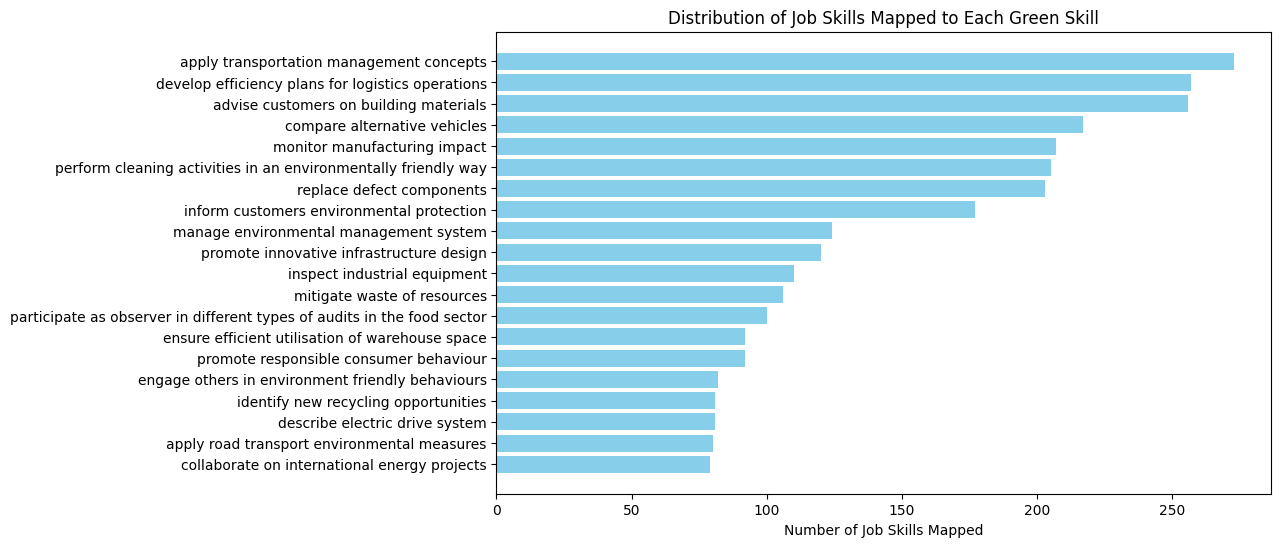

In [10]:
Y = df_skills[df_skills["esco_skill_name"] != "No"]['esco_skill_name'].value_counts().sort_values(ascending=False)
X = Y.index

df_green_skill_values = pd.DataFrame({'skill': X, 'count': Y})
df_green_skill_values.to_csv("../data/green_skill_distribution.csv", index=False)

X = X[:20]
Y = Y[:20]

plt.figure(figsize=(10, 6))
plt.barh(X, Y, color='skyblue')
plt.xlabel('Number of Job Skills Mapped')
plt.title('Distribution of Job Skills Mapped to Each Green Skill')
plt.gca().invert_yaxis()  
plt.show()

In [12]:
print(f"Total unique green skills mapped: {len(df_skills[df_skills['esco_skill_name'] != 'No']['esco_skill_name'].unique())}")
print(f"Total skills detected: {df_green_skill_values['count'].sum()}")
print(f"Percentage of skills mapped to green skills: {df_green_skill_values['count'].sum() / df_skills.shape[0] * 100:.2f}%")

Total unique green skills mapped: 302
Total skills detected: 6073
Percentage of skills mapped to green skills: 8.64%


# Prepare data for model forecasting

The data should be structured as follows:
| skill_id | 2025-01 | 2025-02 | 2025-03 |
|----------|---------|---------|---------|
| skill_1  |   10    |   15    |   20
| skill_2  |   5     |   7     |   9     |
| ...      |   ...   |   ...   |   ...   |

Where each row represents a skill and each column represents the count of job postings requiring that skill for a specific month.

In [14]:
df = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-5_full_dataset.csv")
df = df[df['esco_skill_name'] != 'No']
df.shape

(6073, 6)

In [15]:
df.head(2)

,job_id,job_skill,skill_id,esco_skill_name,alternative_name,prompt
25,243ef92c3012f0f0,capacidad para realizar analisis de parametros...,745,monitor manufacturing impact,monitor environmental parameters,"[{'role': 'system', 'content': 'You are an exp..."
27,243ef92c3012f0f0,capacidad para conducir acciones correctivas y...,1102,implement environmental action plans,carry out environmental action plans,"[{'role': 'system', 'content': 'You are an exp..."


In [16]:
df_jobs = pd.read_csv("../data/jan_to_apr_2025_with_languages_cleaned.csv")
df_jobs.head()

,Title,Job_ID,source,Skills,month,detected_language
0,ventas flotillas,977bbdb05a29b771,indeed,experiencia en prospeccion de clientes,1.0,es
1,ventas flotillas,977bbdb05a29b771,indeed,experiencia en cierre de ventas,1.0,es
2,ventas flotillas,977bbdb05a29b771,indeed,experiencia en giro automotriz,1.0,es
3,ventas flotillas,977bbdb05a29b771,indeed,licencia de manejo indispensable,1.0,es
4,ventas flotillas,977bbdb05a29b771,indeed,habilidad para la prospeccion en empresas (tel...,1.0,es


In [18]:
df_with_months = df.copy()

In [ ]:
df_with_months["job_id"] = df_with_months["job_id"].astype(str).str.strip()
df_jobs["Job_ID"] = df_jobs["Job_ID"].astype(str).str.strip()

df_jobs_unique = df_jobs.drop_duplicates(subset="Job_ID", keep="first")[["Job_ID", "month"]]
df_with_months = df_with_months.merge(df_jobs_unique, left_on="job_id", right_on="Job_ID", how="left")
df_with_months = df_with_months.drop(columns="Job_ID")


In [23]:
df_with_months.head(2)

,job_id,job_skill,skill_id,esco_skill_name,alternative_name,prompt,month
0,243ef92c3012f0f0,capacidad para realizar analisis de parametros...,745,monitor manufacturing impact,monitor environmental parameters,"[{'role': 'system', 'content': 'You are an exp...",1.0
1,243ef92c3012f0f0,capacidad para conducir acciones correctivas y...,1102,implement environmental action plans,carry out environmental action plans,"[{'role': 'system', 'content': 'You are an exp...",1.0


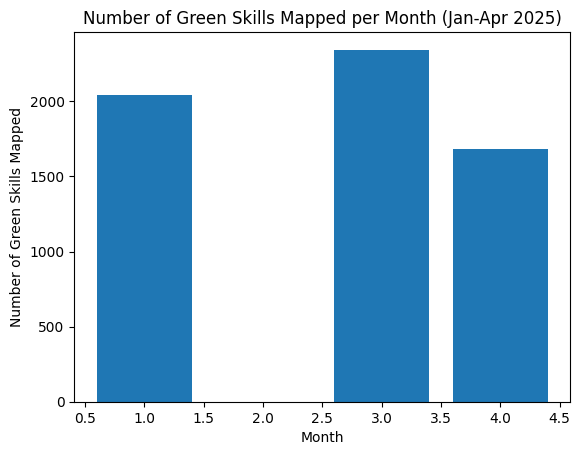

month
1.0    2043
3.0    2344
4.0    1686
Name: count, dtype: int64


In [26]:
plt.bar(df_with_months['month'].value_counts().sort_index().index,
        df_with_months['month'].value_counts().sort_index().values)
plt.xlabel('Month')
plt.ylabel('Number of Green Skills Mapped')
plt.title('Number of Green Skills Mapped per Month (Jan-Apr 2025)')
plt.show()

print(df_with_months['month'].value_counts().sort_index())

### Create pivot table


In [29]:
df_with_months = pd.read_csv("../data/green_skill_classification/green_skills_with_GPT-5_full_dataset_with_months.csv")

counts = df_with_months.copy()
counts = df_with_months.groupby(["esco_skill_name", "month"]).size().reset_index(name="count")

month_map = {1: "2025-01", 3: "2025-03", 4: "2025-04"}
counts["month"] = counts["month"].map(month_map)

result = counts.pivot(index="esco_skill_name", columns="month", values="count").fillna(0).astype(int)

result = result.reset_index()
result.head()

month,esco_skill_name,2025-01,2025-03,2025-04
0,abide by regulations on banned materials,5,3,3
1,adapt energy distribution schedules,1,6,5
2,adopt ways to foster biodiversity and animal w...,0,0,2
3,adopt ways to reduce negative impact of consum...,2,7,8
4,adopt ways to reduce pollution,6,3,2


In [30]:
result.to_csv("../data/green_skill_monthly_distribution.csv", index=False) 

In [31]:
summatory = 0
for col in result.columns[1:]:
    summatory += result[col].sum()
print(summatory)

6073
